In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("UsArrests.csv",index_col='City')
df.head()


,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [2]:
# calculates the basic statistics of the dataframe
# select the specific rows of the dataframe that correspond to the mean, standard deviation, minimum and maximum of each column
# transpose the dataframe so that the columns become rows and the rows become columns

In [3]:
df.describe().loc[["mean","std","min","max"]].transpose()

,mean,std,min,max
Murder,7.788,4.355510,0.8,17.4
Assault,170.760,83.337661,45.0,337.0
UrbanPop,65.540,14.474763,32.0,91.0
Rape,21.232,9.366385,7.3,46.0


In [4]:
# Count missing values
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [5]:
# Examine structure of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
# Create correlation map to see the correlation between values in the dataset and display

In [7]:
countries = df.index
#corr_df = df.drop(["UrbanPop"],axis=1).corr()
corr_df=df.corr()
labels =corr_df.columns

correlations = corr_df.corr()

In [8]:
import seaborn as sns

C:\Users\Gaetano\AppData\Local\Temp\ipykernel_2548\3929468127.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr_df, cmap="coolwarm", annot=True,  mask=np.triu(np.ones(corr_df.shape)).astype(np.bool))


<AxesSubplot:>

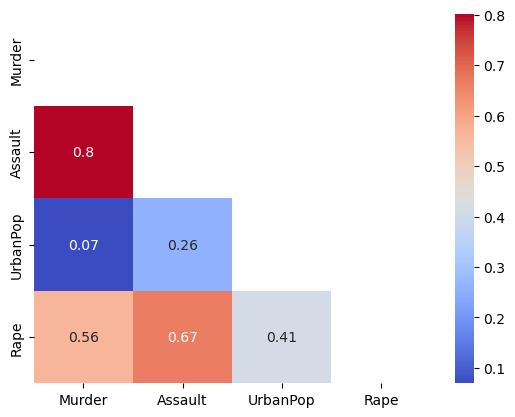

In [9]:
sns.heatmap(corr_df, cmap="coolwarm", annot=True,  mask=np.triu(np.ones(corr_df.shape)).astype(np.bool))

In [10]:
# Assault and murder have a strong correlation, meaning as the number of assaults increase in a city, so does the number of murders.
# Urban Pop and murder have almost zero correlation.

In [11]:
# Import PCA to detect the most important patterns in the dataset and create features of importance

In [12]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA()

# PCA applied it to the input data X, generating a new transformed data with reduced dimensions

X_trans = pca.fit_transform(df)

df_pca = pd.DataFrame(data=X_trans, columns=['PCA%i' % i for i in range(X_trans.shape[1])], index=df.index)
df_pca.head()

,PCA0,PCA1,PCA2,PCA3
City,,,,
Alabama,64.802164,11.448007,-2.494933,2.407901
Alaska,92.827450,17.982943,20.126575,-4.094047
Arizona,124.068216,-8.830403,-1.687448,-4.353685
Arkansas,18.340035,16.703911,0.210189,-0.520994
California,107.422953,-22.520070,6.745873,-2.811826


In [15]:
# calculates the amount of variation for each column of the DataFrame df_pca

In [16]:
std = df_pca.std()
print(f"Standard deviation of PCA: {std.values}")

Standard deviation of PCA: [83.73240025 14.21240185  6.48942607  2.48279   ]


In [42]:
# Create function biplot for visualization of PCA analysis, and plots in a scatter plot

In [43]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = countries[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
# Standardize the data to a mean of 0 and a standard deviation of 1 before feeding it to the algorithm for better performance

In [46]:
X_std = StandardScaler().fit_transform(df)
pca = PCA()
X_std_trans = pca.fit_transform(X_std)
df_std_pca = pd.DataFrame(data=X_std_trans, columns=['PCA%i' % i for i in range(X_std_trans.shape[1])])
df_std_pca.head()

,PCA0,PCA1,PCA2,PCA3
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


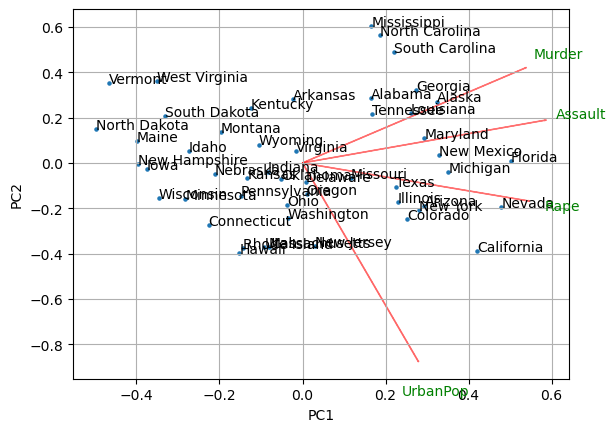

In [47]:
biplot(X_std_trans[:,0:],np.transpose(pca.components_[0:2, :]),list(labels))
plt.show()

In [48]:
# The biplot shows how important each feature is by the length of arrows, longer arrow means more important feature

In [53]:
# Features of importance

In [52]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [54]:
# Display relevance of principale features of importance in a scree plot graph

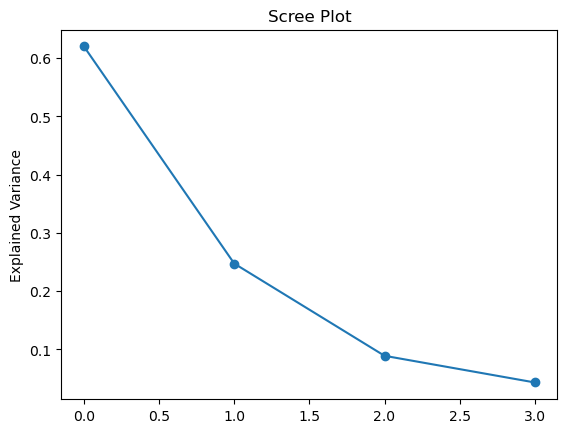

In [57]:
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.ylabel('Explained Variance')
plt.title("Scree Plot")
plt.show()

In [29]:
# creates a new DataFrame that holds the all the principal components of the standardized data

In [30]:
pca_df = pd.DataFrame(X_std_trans, index = df.index)
pca_df.head()

,0,1,2,3
City,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [32]:
# The dendogram below shows the hierarchical relationship between the elements of the data set.
# Same color indicates similar values between clusters. There are 4 main clusters in this dataset.
# The vertical blue line (Euclidean distance) indicates the similarity of the clusters: similar is the lenght, similar are the clusters 

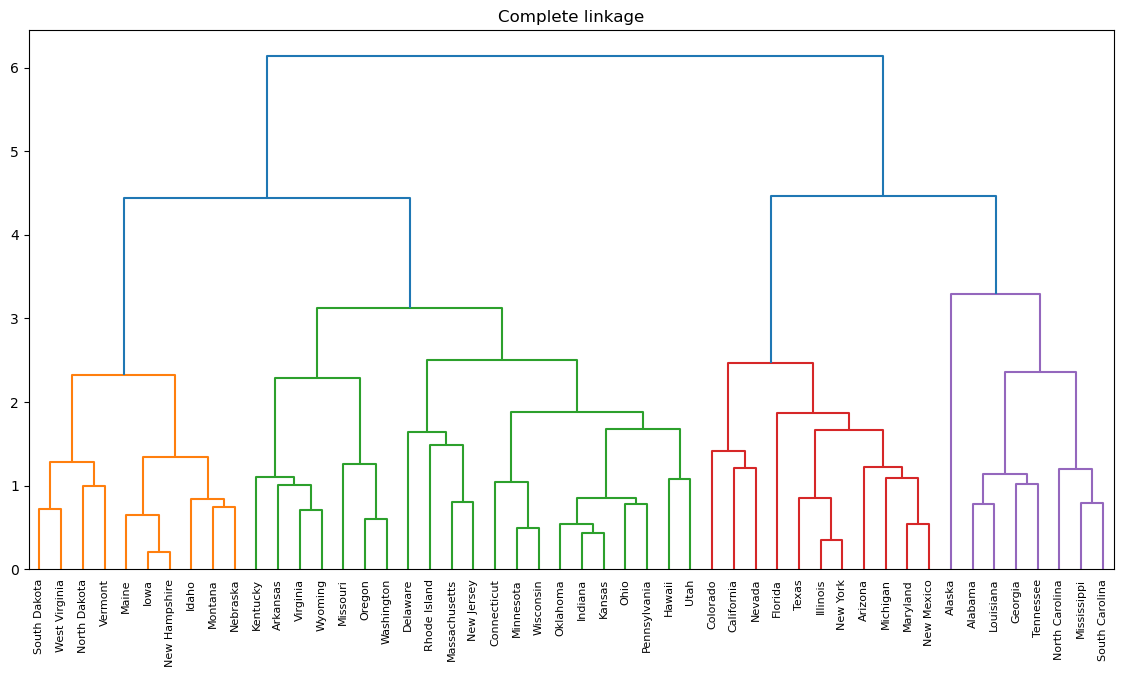

In [33]:
plt.figure(figsize=(14, 7)),plt.title("Complete linkage")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

In [34]:
from sklearn.cluster import KMeans

In [35]:
# Fit k-means with a constant value of 4 

In [36]:
k=4
kmeans = KMeans(n_clusters= k)
cluster_labels = kmeans.fit_predict(pca_df)
centroids = kmeans.cluster_centers_

In [37]:
# returns the centertroids coordinates of each cluster formed by the KMeans algorithm on the dataset

In [38]:
centroids = kmeans.cluster_centers_

In [39]:
# Plot clusters: the cities with the same color have similar episodes of Murder, Assault, Rape and Urban Pop.
# This can be related to unkwons factors not presented in the datased; for example location, education etc.
# The main point of clustering is to group similar data points together,so that patterns within the data can be more easily identified

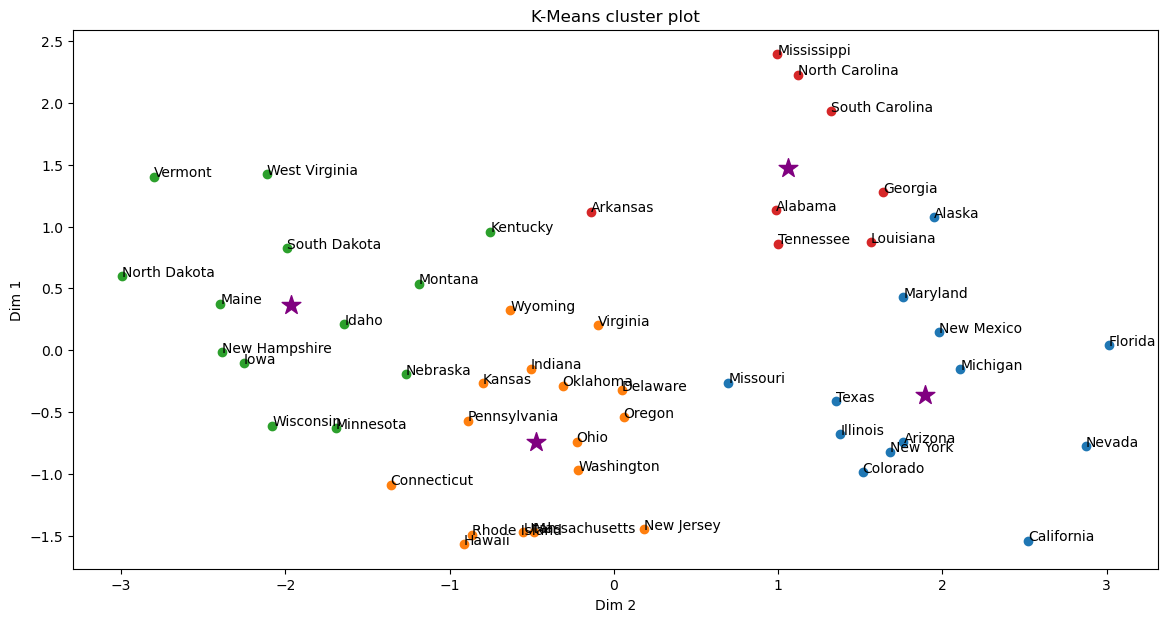

In [40]:

fig, ax = plt.subplots(figsize=(14, 7))


for i in range(k):
    ax.scatter(pca_df[cluster_labels == i][0], pca_df[cluster_labels == i][1])
    
for i in range(k):
    ax.scatter(centroids[i][0], centroids[i][1], marker='*', c='Purple', s=200)  
    
for i, txt in enumerate(pca_df.index):
    ax.annotate(txt, (pca_df.iloc[i, 0], pca_df.iloc[i, 1]))
ax.set(title='K-Means cluster plot', xlabel='Dim 2', ylabel='Dim 1')
plt.show()


In [ ]:
# github : https://github.com/Gaetanolopez/finalCapstone